In [1]:
import math

from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "iris.data"

Đọc dữ liệu

In [3]:
x = np.genfromtxt(data_path, delimiter=",", usecols=(0, 1, 2, 3))

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Đọc nhãn các loại hoa

In [5]:
y = np.genfromtxt(data_path, delimiter=",", usecols=4, dtype=str)

In [6]:
y.tolist()

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


Tên các đặc trưng tương ứng

In [7]:
names = ["setal_length", "setal_width", "petal_length", "petal_width"]

Đặt màu tương ứng với các loại hoa

In [8]:
color_dict = {'Iris-setosa': "red", 'Iris-versicolor': "green", 'Iris-virginica': "blue"}

Vẽ biểu đồ scatter plot với từng cặp đặc trưng

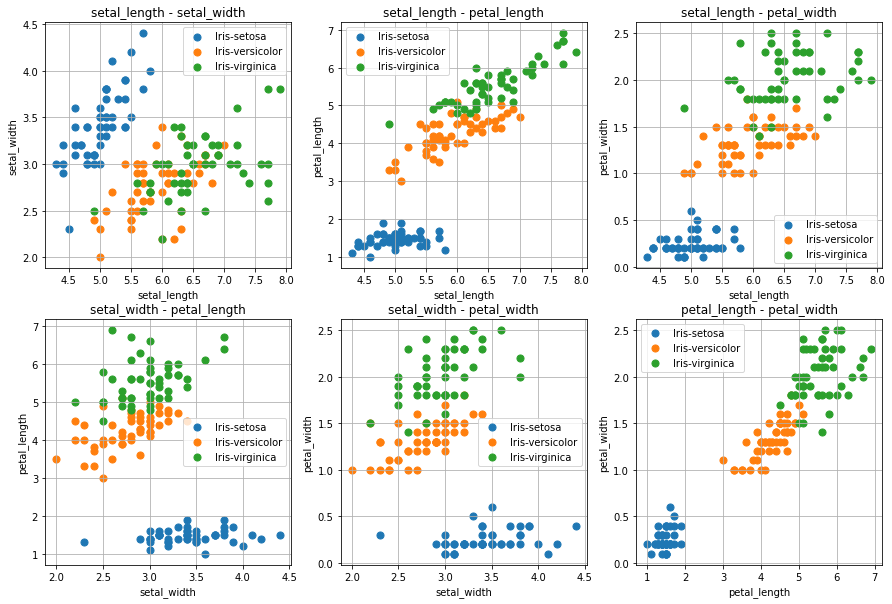

In [9]:
fig = plt.figure(figsize=(15, 10), facecolor='w')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(x.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

for couple in combinations(range(x.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("{} - {}".format(names[couple[0]], names[couple[1]]))
    x_ax = x[:, couple[0]]
    y_ax = x[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel(names[couple[0]])
    ax.set_ylabel(names[couple[1]])
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min()))*1.0)
    ax.grid()
    ax.legend()
    i += 1


Xây dựng ma trận kernel sử dụng Gaussian RBF kernel:

$$\bold{K}=\Big\lbrace K\Big(\bold{x}_i, \bold{x}_j\Big) \Big\rbrace_{i,j=1,\dots,n}=\Bigg\lbrace\exp\Big\lbrace - \dfrac{\lVert \bold{x}_i - \bold{x}_j \rVert^2}{2 \sigma^2} \Big\rbrace \Bigg\rbrace_{i,j=1,\dots,n}$$

In [10]:
#K = np.sqrt(np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :])**2, axis=2))
K = np.exp(- np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :])**2, axis=2) / (2 * 6**2))

In [11]:
K

array([[1.        , 0.99598032, 0.9963954 , ..., 0.75862325, 0.74050961,
        0.7881589 ],
       [0.99598032, 1.        , 0.99875078, ..., 0.75494445, 0.73405842,
        0.78695569],
       [0.9963954 , 0.99875078, 1.        , ..., 0.73948184, 0.72142434,
        0.77362605],
       ...,
       [0.75862325, 0.75494445, 0.73948184, ..., 1.        , 0.99473613,
        0.99432174],
       [0.74050961, 0.73405842, 0.72142434, ..., 0.99473613, 1.        ,
        0.99183904],
       [0.7881589 , 0.78695569, 0.77362605, ..., 0.99432174, 0.99183904,
        1.        ]])

Tính $\bold{K}=\Big( \bold{I} - \dfrac{1}{n} \bold{1}_{n \times n} \Big) \bold{K} \Big( \bold{I} - \dfrac{1}{n} \bold{1}_{n \times n} \Big)$

In [12]:
n = K.shape[0]
assert K.shape[0] == K.shape[1]

In [13]:
K = np.matmul(np.eye(n) - np.ones(shape=(n, n))/n, K)
K = np.matmul(K, np.eye(n) - np.ones(shape=(n, n))/n)

In [14]:
K

array([[ 0.17475656,  0.17211132,  0.18216917, ..., -0.11452785,
        -0.12094077, -0.09568813],
       [ 0.17211132,  0.17750542,  0.18589898, ..., -0.11683222,
        -0.12601754, -0.09551691],
       [ 0.18216917,  0.18589898,  0.19679097, ..., -0.12265205,
        -0.12900884, -0.09920378],
       ...,
       [-0.11452785, -0.11683222, -0.12265205, ...,  0.07894124,
         0.08537808,  0.06256705],
       [-0.12094077, -0.12601754, -0.12900884, ...,  0.08537808,
         0.10234267,  0.07178506],
       [-0.09568813, -0.09551691, -0.09920378, ...,  0.06256705,
         0.07178506,  0.05754938]])

Tính $\Big( \eta_1, \eta_2, \dots, \eta_n \Big)=\mathrm{eigenvalues}\Big( \bold{K} \Big)$ và $\Big( c_1, c_2, \dots, c_n \Big)=\mathrm{eigenvectorss}\Big( \bold{K} \Big)$

In [15]:
eta, c = np.linalg.eig(K)

In [16]:
eta = np.real(eta)
c = np.real(c)

Sắp xếp lại các giá trị riêng theo chiều không tăng (thực ra không cần thiết vì numpy trả về các giá trị riêng đã được sắp xếp theo chiều không tăng)

In [17]:
order = np.argsort(eta)[::-1]
eta = eta[order]
c = c[:, order]

In [18]:
eta

array([ 1.45314813e+01,  1.21254036e+00,  3.86876476e-01,  3.04593175e-01,
        9.09561343e-02,  5.82468291e-02,  1.70813682e-02,  1.48197591e-02,
        6.47790664e-03,  5.00278522e-03,  2.08206527e-03,  1.31343362e-03,
        7.61619937e-04,  5.94225834e-04,  4.15704025e-04,  2.11669860e-04,
        1.97881265e-04,  1.66440517e-04,  1.13868773e-04,  8.20881038e-05,
        5.12572298e-05,  4.66945726e-05,  2.43782325e-05,  1.68826067e-05,
        1.20759698e-05,  1.05060452e-05,  7.82386031e-06,  4.25318312e-06,
        3.60393553e-06,  2.95451355e-06,  2.06454432e-06,  1.43388268e-06,
        1.37180641e-06,  1.22995398e-06,  9.78440325e-07,  6.53896785e-07,
        6.09786594e-07,  4.67687224e-07,  3.73407231e-07,  3.10525534e-07,
        2.86595693e-07,  2.03616927e-07,  1.50623233e-07,  1.31100459e-07,
        1.17501246e-07,  8.47378542e-08,  7.01668312e-08,  5.21829776e-08,
        4.60046130e-08,  3.72832080e-08,  3.14026773e-08,  2.55615556e-08,
        1.66621265e-08,  

In [19]:
c

array([[ 0.10851102, -0.05345852, -0.01014633, ...,  0.01087968,
         0.0714195 ,  0.0714195 ],
       [ 0.10920632, -0.00292422,  0.08211037, ...,  0.00374418,
         0.02429912,  0.02429912],
       [ 0.11511148, -0.01689699,  0.09782752, ...,  0.00812817,
         0.03821658,  0.03821658],
       ...,
       [-0.07306546, -0.00904778, -0.02262395, ...,  0.00432378,
         0.01554418,  0.01554418],
       [-0.07753294, -0.02215501, -0.00702547, ...,  0.00260505,
         0.02410251,  0.02410251],
       [-0.05868612,  0.0495284 , -0.00337931, ...,  0.00233598,
         0.01911131,  0.01911131]])

Tính $\lambda_i = \dfrac{\eta_i}{n}, i=1,\dots,n$

In [20]:
lamb_da = eta / n

lamb_da

array([ 9.68765421e-02,  8.08360239e-03,  2.57917651e-03,  2.03062117e-03,
        6.06374229e-04,  3.88312194e-04,  1.13875788e-04,  9.87983937e-05,
        4.31860442e-05,  3.33519015e-05,  1.38804352e-05,  8.75622412e-06,
        5.07746625e-06,  3.96150556e-06,  2.77136017e-06,  1.41113240e-06,
        1.31920843e-06,  1.10960344e-06,  7.59125156e-07,  5.47254025e-07,
        3.41714865e-07,  3.11297151e-07,  1.62521550e-07,  1.12550711e-07,
        8.05064655e-08,  7.00403015e-08,  5.21590687e-08,  2.83545542e-08,
        2.40262369e-08,  1.96967570e-08,  1.37636288e-08,  9.55921785e-09,
        9.14537606e-09,  8.19969319e-09,  6.52293550e-09,  4.35931190e-09,
        4.06524396e-09,  3.11791482e-09,  2.48938154e-09,  2.07017023e-09,
        1.91063795e-09,  1.35744618e-09,  1.00415489e-09,  8.74003058e-10,
        7.83341639e-10,  5.64919028e-10,  4.67778875e-10,  3.47886518e-10,
        3.06697420e-10,  2.48554720e-10,  2.09351182e-10,  1.70410371e-10,
        1.11080843e-10,  

Tính $\bold{c}_i = \sqrt{\dfrac{1}{\eta_i}}\bold{c}_i, i=1,\dots,n$

In [21]:
c = c / (np.sqrt(eta + 1e-8)[np.newaxis, :])

Tính $f(r)=\dfrac{\sum_{i=1}^r \lambda_i}{\sum_{i=1}^d \lambda_i}, i=1,\dots, n$

In [22]:
rate = np.cumsum(lamb_da) / np.sum(lamb_da)

In [23]:
rate

array([0.8735903 , 0.94648469, 0.96974258, 0.98805383, 0.99352185,
       0.99702348, 0.99805036, 0.99894128, 0.99933071, 0.99963147,
       0.99975663, 0.99983559, 0.99988138, 0.9999171 , 0.99994209,
       0.99995482, 0.99996672, 0.99997672, 0.99998357, 0.9999885 ,
       0.99999158, 0.99999439, 0.99999586, 0.99999687, 0.9999976 ,
       0.99999823, 0.9999987 , 0.99999895, 0.99999917, 0.99999935,
       0.99999947, 0.99999956, 0.99999964, 0.99999972, 0.99999977,
       0.99999981, 0.99999985, 0.99999988, 0.9999999 , 0.99999992,
       0.99999994, 0.99999995, 0.99999996, 0.99999997, 0.99999997,
       0.99999998, 0.99999998, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

Đặt $\alpha=0.95$

In [24]:
alpha = 0.95

Chọn $r$ nhỏ nhất sao cho $f(r) \geq \alpha$

In [25]:
r = np.where(rate >= alpha)

In [26]:
r[0][0] + 1

3

Tính cơ sở $\bold{C}_r = \begin{pmatrix} \bold{c}_1, \bold{c}_2, \dots, \bold{c}_r \end{pmatrix}$

In [27]:
C = c[:, :(r[0][0] + 1)]

Tính dữ liệu đã được giảm chiều:

$$\bold{A}=\lbrace \bold{a}_i \vert \bold{a}_i = \bold{C}_r^T \bold{K}_i, i=1, \dots, n \rbrace$$

In [28]:
reduced_data = np.matmul(C.T, K).T

In [29]:
reduced_data

array([[ 0.41364595, -0.05886606, -0.00631096],
       [ 0.41629647, -0.00322002,  0.05107215],
       [ 0.43880705, -0.01860619,  0.06084813],
       [ 0.41968418,  0.01028892,  0.06943472],
       [ 0.41931533, -0.06270071, -0.00359177],
       [ 0.35785466, -0.0884795 , -0.07850007],
       [ 0.42997161, -0.02130392,  0.04981377],
       [ 0.40597314, -0.0371493 ,  0.00640334],
       [ 0.4354912 ,  0.02913648,  0.11003693],
       [ 0.41125637, -0.00760244,  0.0407099 ],
       [ 0.38950566, -0.08747705, -0.05375261],
       [ 0.40369839, -0.01944434,  0.02214073],
       [ 0.42529371, -0.00117103,  0.0629952 ],
       [ 0.47614012, -0.00258766,  0.12946117],
       [ 0.40420571, -0.15847447, -0.0964578 ],
       [ 0.36812907, -0.16638514, -0.12858887],
       [ 0.40396759, -0.11444846, -0.06173444],
       [ 0.40890239, -0.05614784, -0.00802812],
       [ 0.34605517, -0.10004259, -0.09728603],
       [ 0.40037075, -0.0771026 , -0.03363143],
       [ 0.3628645 , -0.04634752, -0.040

Biểu diễn dữ liệu sau khi đã được giảm chiều (vẽ scatterplot của đôi một các cặp trục được chọn sau phần tích thành phần chính)

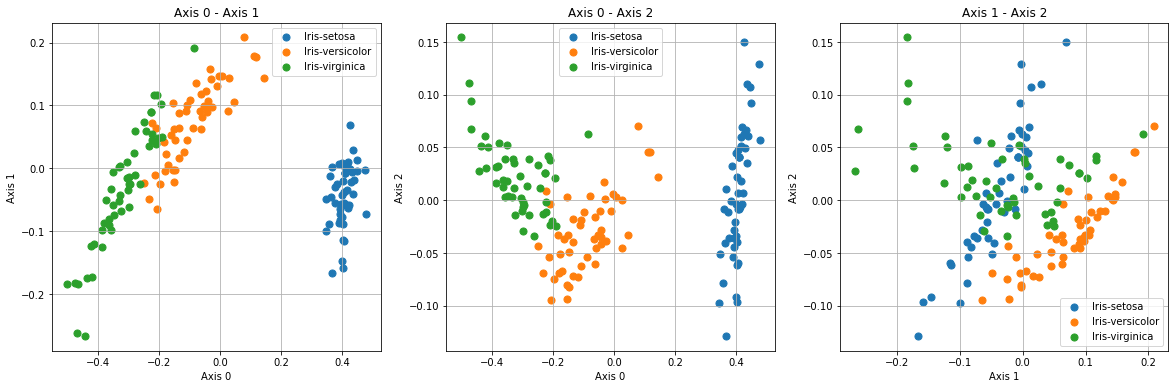

In [30]:
fig = plt.figure(figsize=(20, 20), facecolor='w')
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(reduced_data.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

#fig, ax = plt.subplots(rows, cols)
for couple in combinations(range(reduced_data.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("Axis {} - Axis {}".format(couple[0], couple[1]))
    x_ax = reduced_data[:, couple[0]]
    y_ax = reduced_data[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel("Axis {}".format(couple[0]))
    ax.set_ylabel("Axis {}".format(couple[1]))
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min()))*1.0)
    ax.grid()
    ax.legend()
    i += 1